In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


In [2]:
df = pd.read_csv("Maternal Health Risk Data Set.csv")

In [3]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [6]:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [8]:
df.shape

(1014, 7)

In [9]:
df.info

<bound method DataFrame.info of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]>

In [10]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [12]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [4]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [5]:
df.duplicated().sum()

562

In [6]:
# Assuming your DataFrame is named df
duplicate_rows = df[df.duplicated()]

# Display the rows with duplicate values
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
67     19         120           80   7.0      98.0         70   mid risk
72     19         120           80   7.0      98.0         70   mid risk
97     19         120           80   7.0      98.0         70   mid risk
106    50         140           90  15.0      98.0         90  high risk
107    25         140          100   6.8      98.0         80  high risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[562 rows x 7 columns]


In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(452, 7)

In [9]:
for i in df.columns:
    if df[i].dtype == 'float64':
        df[i] = df[i].astype('int64')

In [10]:
df.dtypes

Age             int64
SystolicBP      int64
DiastolicBP     int64
BS              int64
BodyTemp        int64
HeartRate       int64
RiskLevel      object
dtype: object

In [24]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15,98,86,high risk
1,35,140,90,13,98,70,high risk
2,29,90,70,8,100,80,high risk
3,30,140,85,7,98,70,high risk
4,35,120,60,6,98,76,low risk


In [25]:
class eda(object):
    def univariate_analysis(df):
        print('1.UNIVARIATE ANALYSIS')
        print('1.1 BOXPLOT-------------------------------------------------')
        for i in df.columns:
            # Create a boxplot
            plt.figure(figsize=(8, 6))
            sns.boxplot(df[i])
            plt.title('Boxplot of {}'.format(i))
            plt.show()
    
        print('=========================================================================')
        print('1.2 HISTOGRAM ------------------------------------------------')
        for i in df.columns:
            # Create a histogram
            plt.figure(figsize=(8, 6))
            sns.histplot(df[i], bins=5, kde=False, color='skyblue')
            plt.title('Histogram Example {}'.format(i))
            plt.xlabel('Values')
            plt.ylabel('Frequency')
            plt.show()
            
        print('==========================================================================')
        print('1.3 QQ PLOT----------------------------------------------------')
        for i in df.columns:
            # Create Q-Q plot
            fig, ax = plt.subplots(figsize=(8, 6))
            sm.qqplot(df[i], line='s', ax=ax)
            plt.title('Q-Q Plot {}'.format(i))
            plt.show()
            
        print('==========================================================================') 
    def bivariate_analysis(df,x):
        print('2. BIVARIATE ANALYSIS')
        print('2.1 SCATTER PLOT-----------------------------------------------')
        for i in df.columns:
            if i != 'Concrete_strength':
                # Scatter plot
                plt.scatter(df[x], df[i])
                plt.title('Scatter Plot of {} v/s concrete'.format(i))
                plt.xlabel('X-axis')
                plt.ylabel('Y-axis')
                plt.show()
                
                
        print('==========================================================================') 
    def correlarion(df, x):
        print('3.1 CORRELATION ANALYSIS-----------------------------------------------')
        # Adjust the figure size as per your preference
        plt.figure(figsize=(12, 10))  

        # Compute the correlation matrix using the 'spearman' method
        correlation_matrix = df.corr(method='spearman')


        sns.heatmap (data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

        # Set the title and axis labels
        plt.title('Correlation Heatmap')
        plt.tight_layout()  # Improve the spacing between the heatmap and the axis labels

        plt.show()
        
        corr = df.corr()
        target_corr = corr[x].drop(x)

        #Sort corelation in descending order
        target_corr_sort = target_corr.sort_values(ascending = False)

        #Plot Graphn
        sns.heatmap(target_corr_sort.to_frame(), cmap = 'coolwarm', annot = True)
        plt.show()
        
        

1.UNIVARIATE ANALYSIS
1.1 BOXPLOT-------------------------------------------------


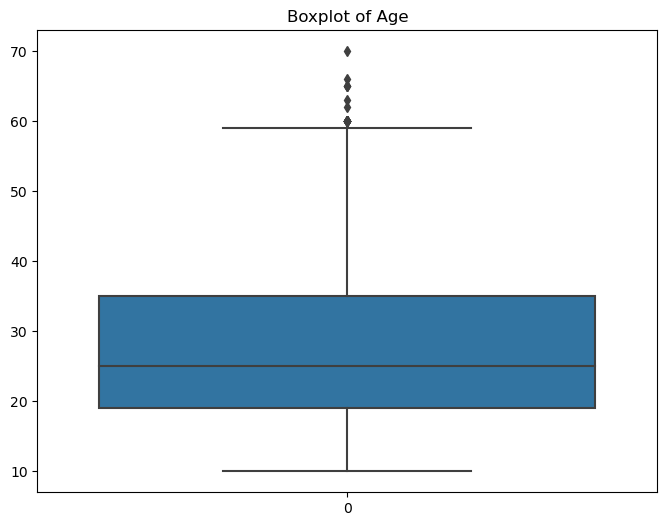

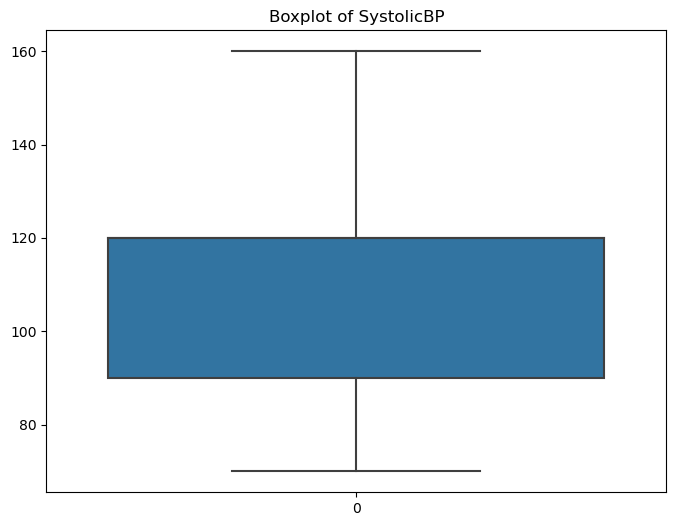

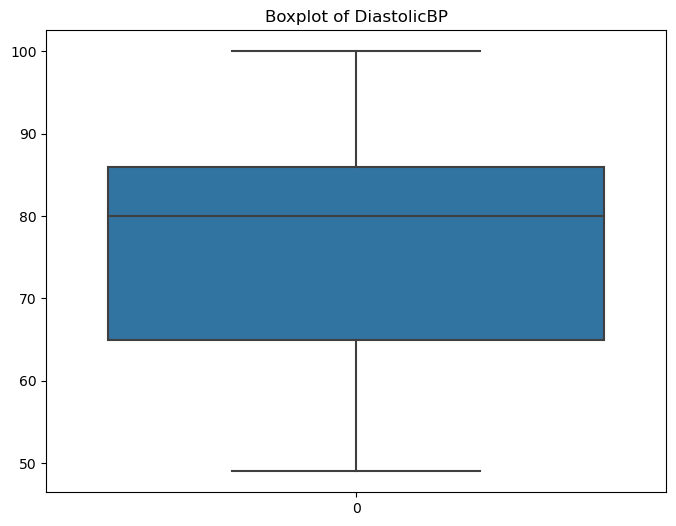

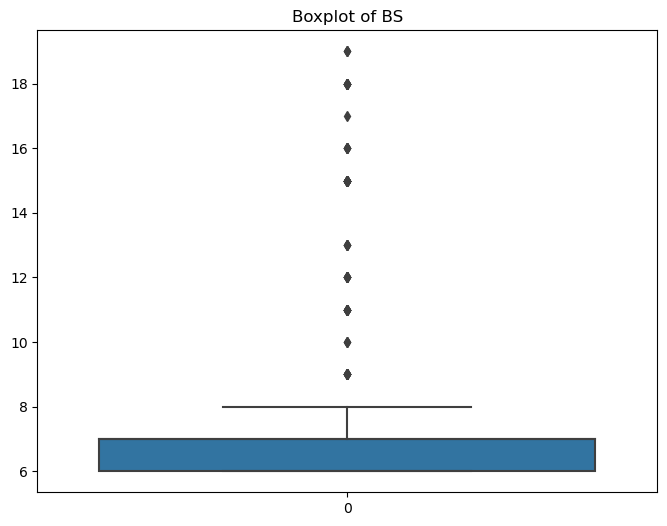

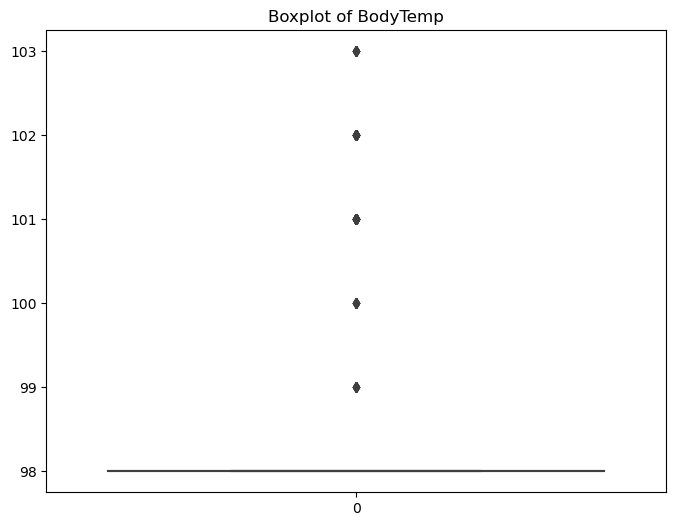

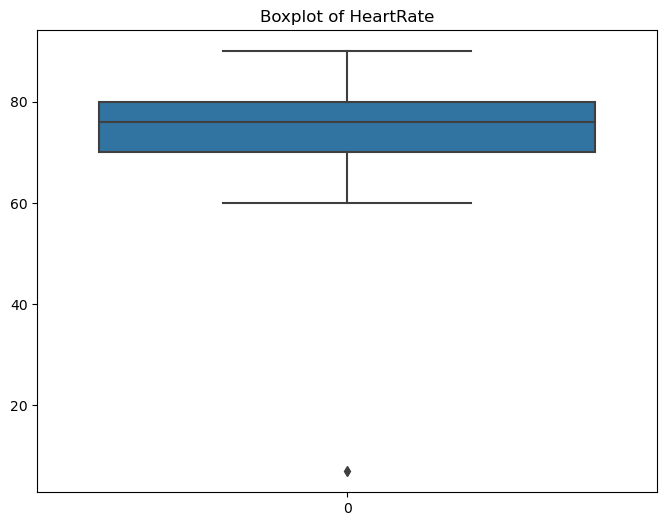

1.2 HISTOGRAM ------------------------------------------------


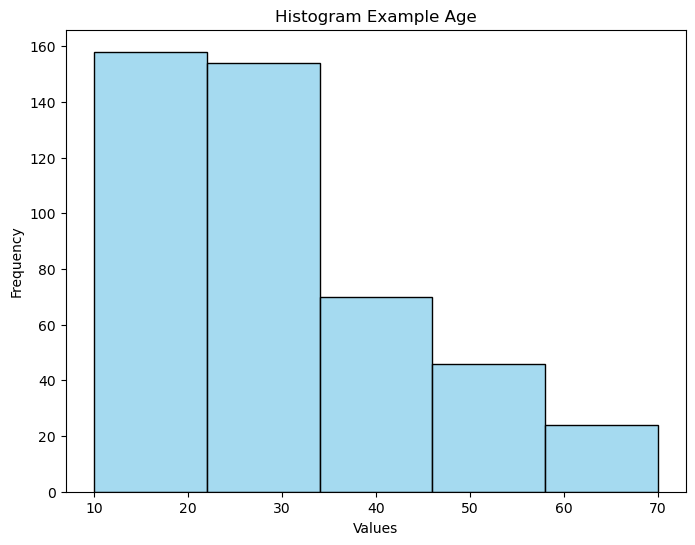

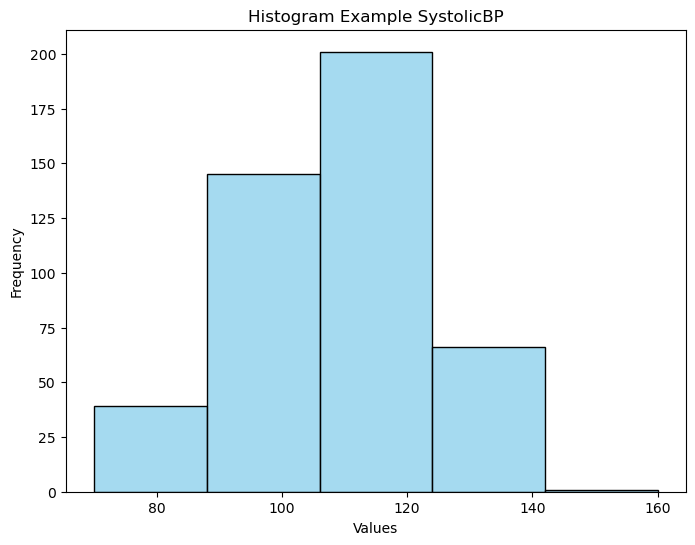

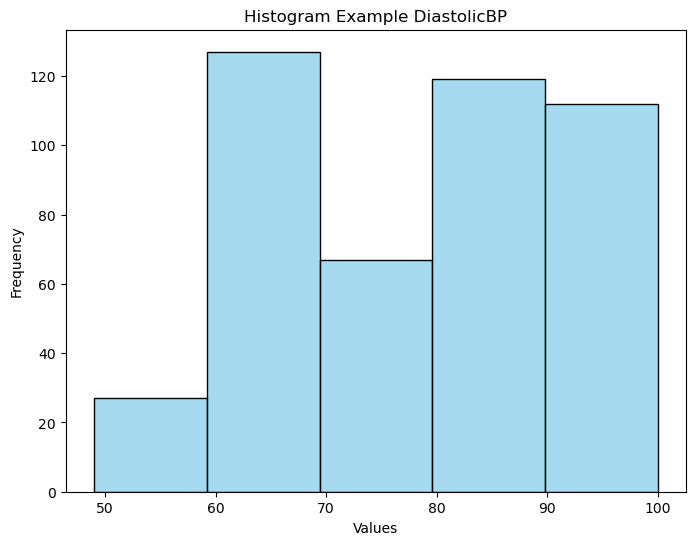

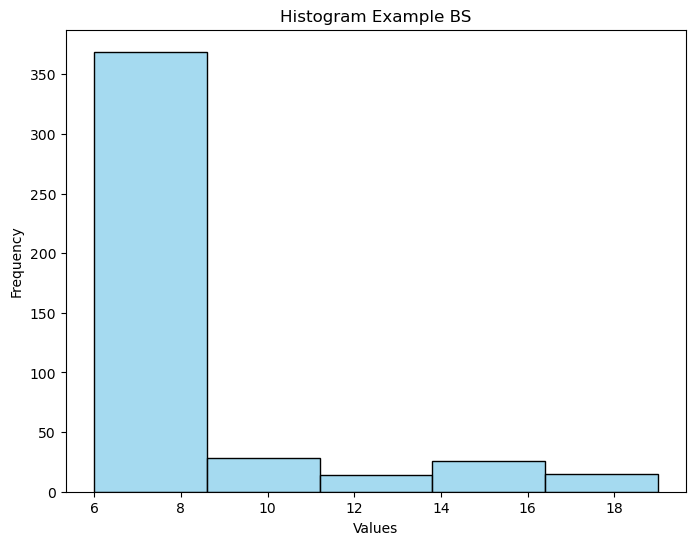

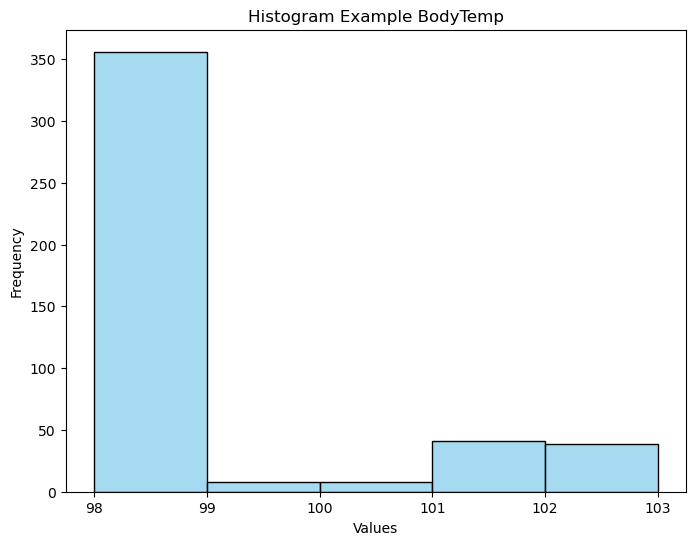

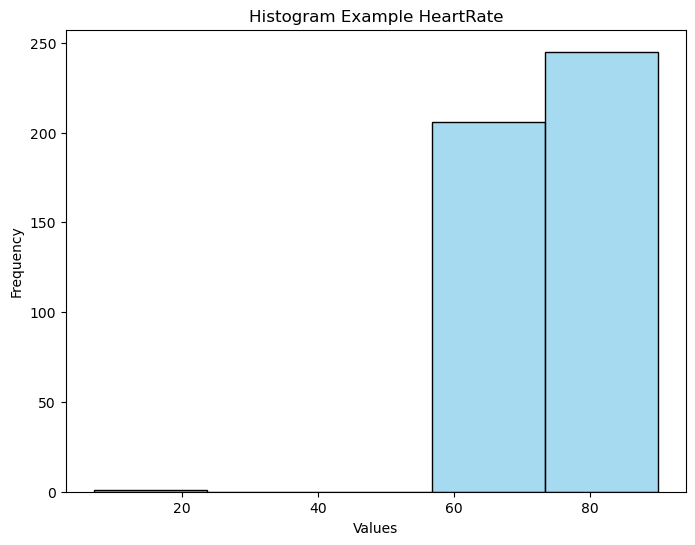

1.3 QQ PLOT----------------------------------------------------


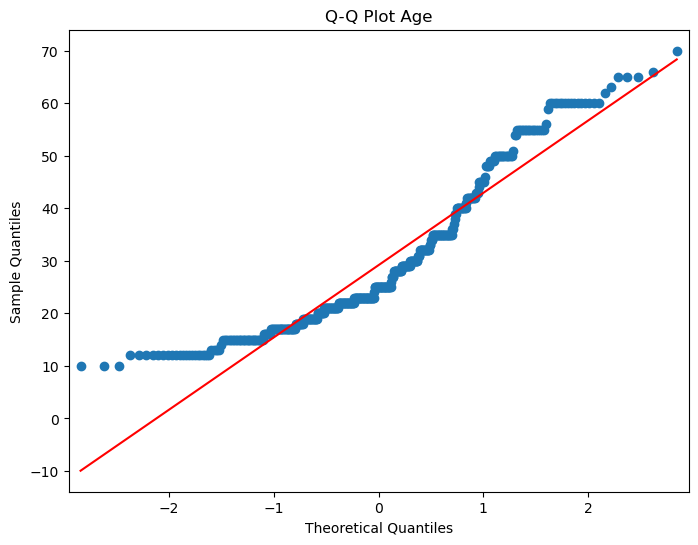

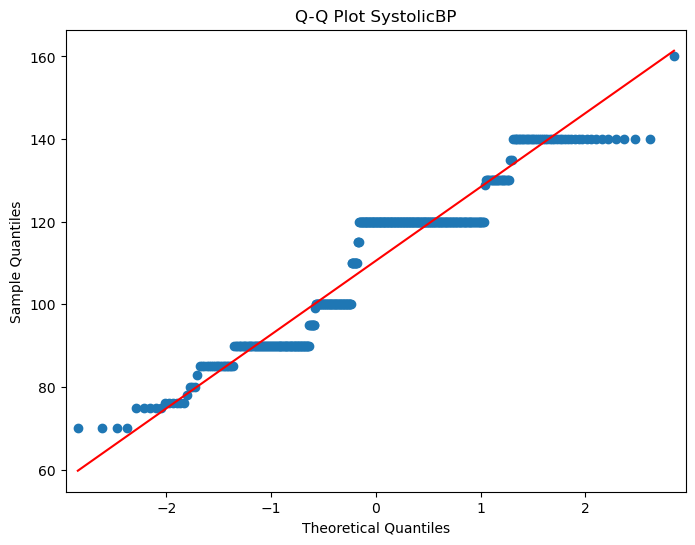

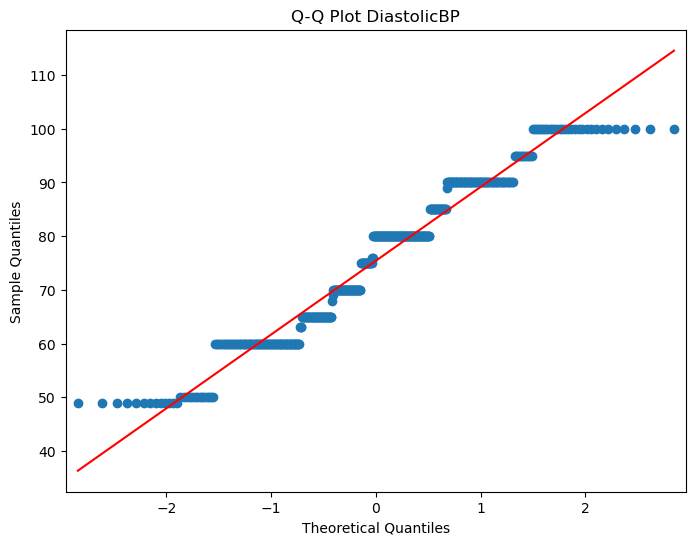

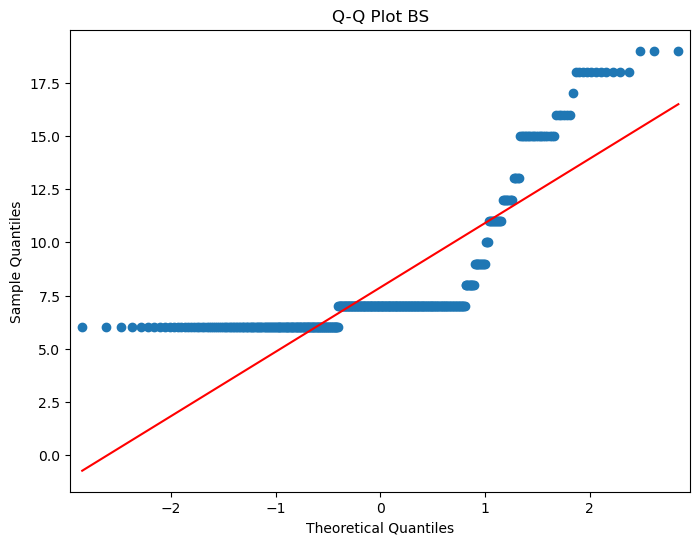

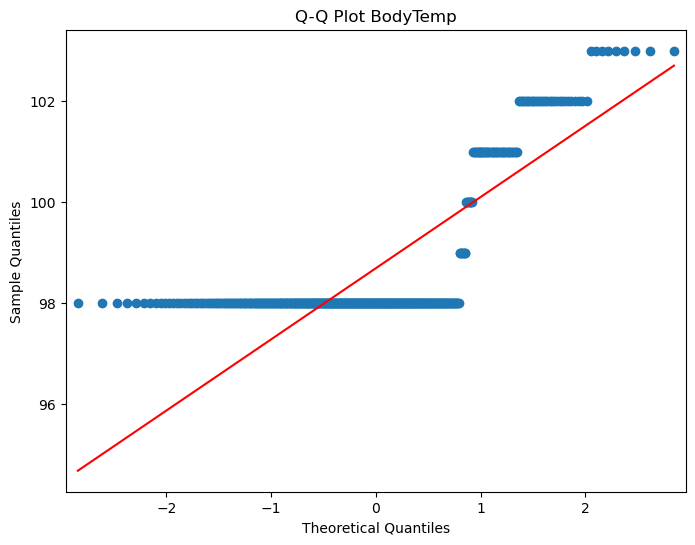

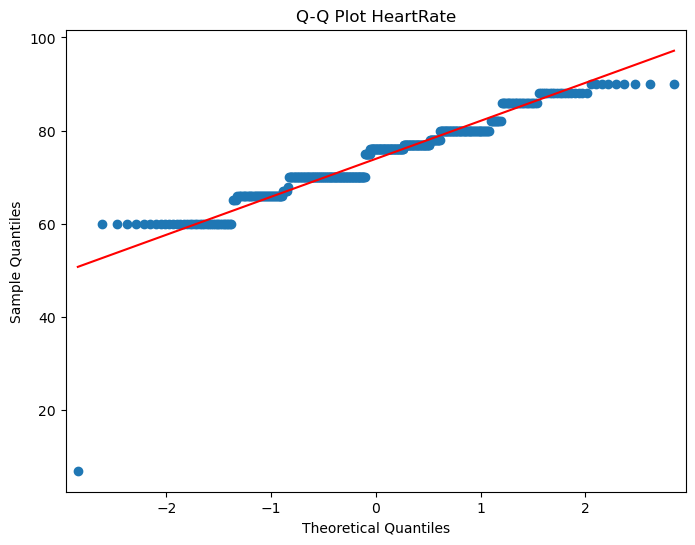

In [32]:
eda.univariate_analysis(df.drop(columns=['RiskLevel'],axis=1))

2. BIVARIATE ANALYSIS
2.1 SCATTER PLOT-----------------------------------------------


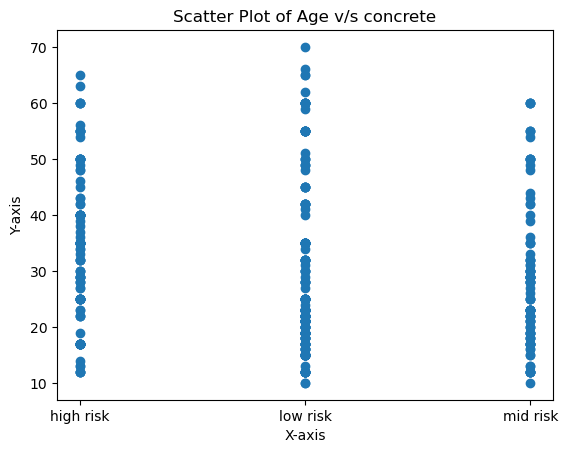

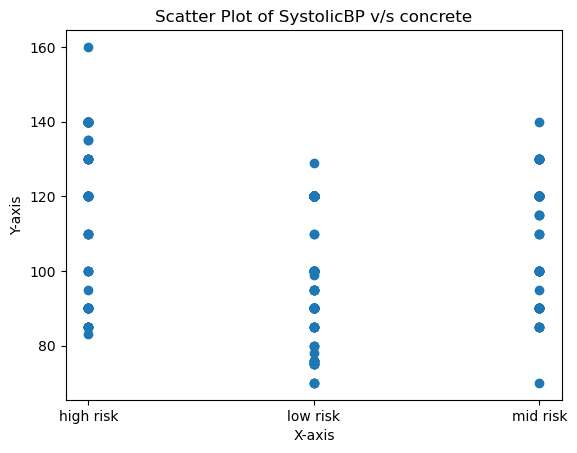

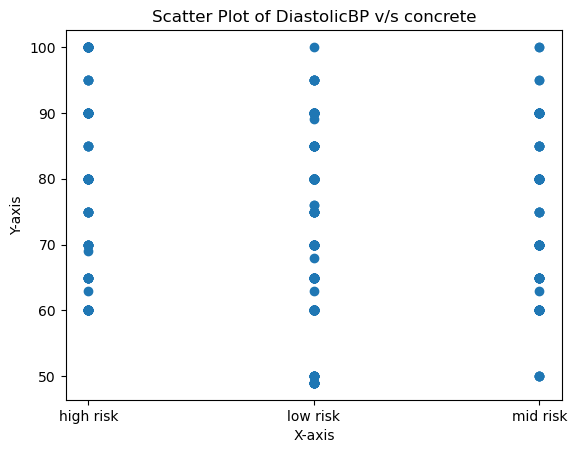

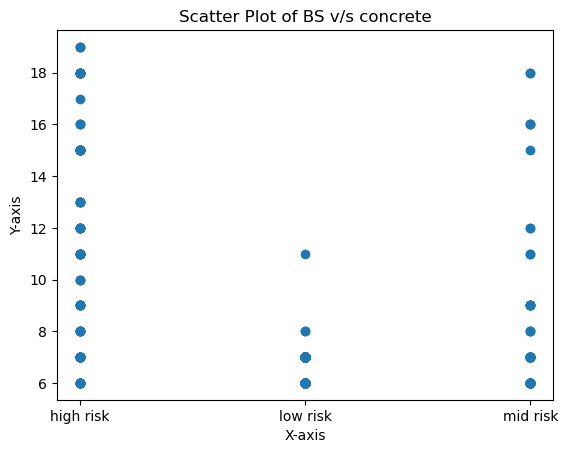

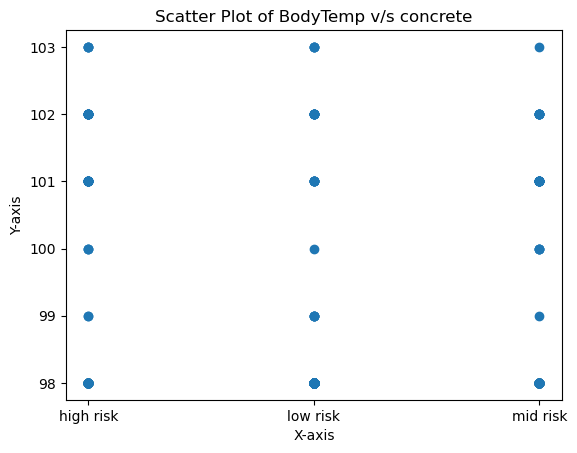

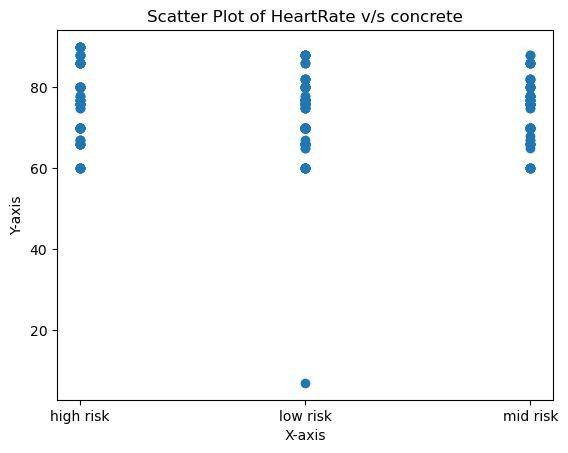

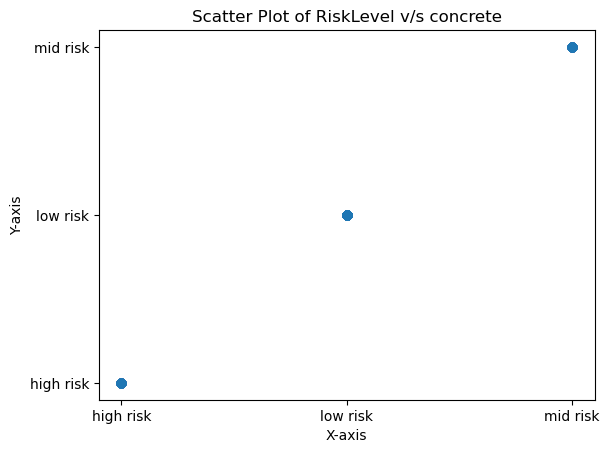

In [39]:
target = 'RiskLevel'
eda.bivariate_analysis(df, target)

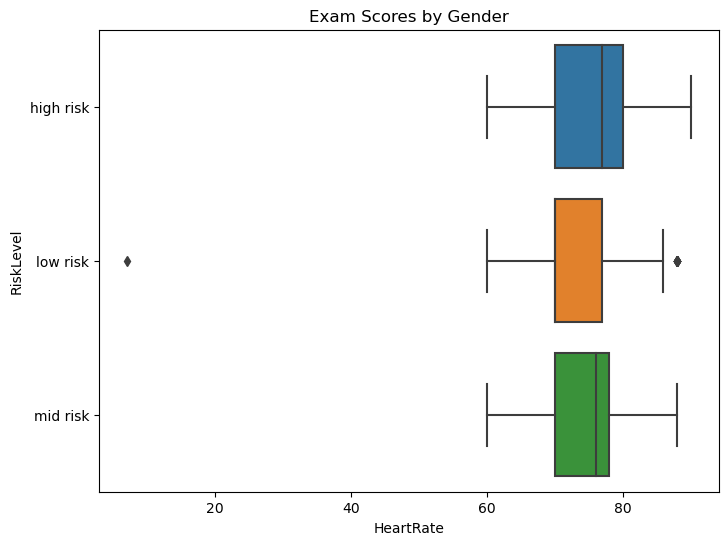

In [46]:


# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartRate', y=target, data=df)
plt.title('Exam Scores by Gender')
plt.show()

C:\Users\sudar\AppData\Local\Temp\ipykernel_17068\2929060018.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='spearman')


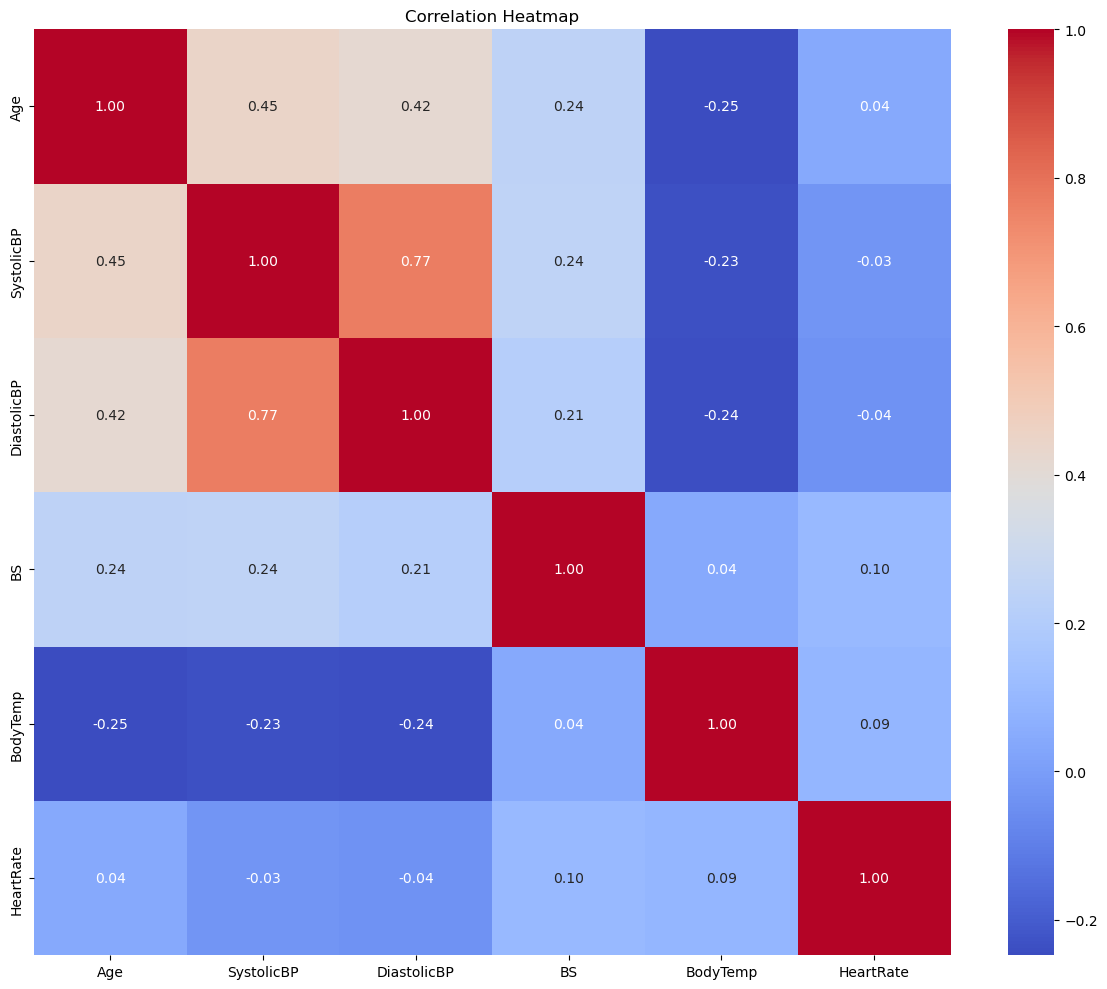

In [47]:
# Adjust the figure size as per your preference
plt.figure(figsize=(12, 10))  

# Compute the correlation matrix using the 'spearman' method
correlation_matrix = df.corr(method='spearman')


sns.heatmap (data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title and axis labels
plt.title('Correlation Heatmap')
plt.tight_layout()  # Improve the spacing between the heatmap and the axis labels

plt.show()

In [15]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15,98,86,high risk
1,35,140,90,13,98,70,high risk
2,29,90,70,8,100,80,high risk
3,30,140,85,7,98,70,high risk
4,35,120,60,6,98,76,low risk


In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_category = encoder.fit_transform(df[['RiskLevel']].values.reshape(-1, 1))

# Create a DataFrame with the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_category, columns=encoder.get_feature_names_out(['RiskLevel']))


# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original 'Category' column as it's no longer needed
df_encoded.drop('RiskLevel', axis=1, inplace=True)

C:\Users\sudar\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
df_encoded.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk
0,25.0,130.0,80.0,15.0,98.0,86.0,1.0,0.0,0.0
1,35.0,140.0,90.0,13.0,98.0,70.0,1.0,0.0,0.0
2,29.0,90.0,70.0,8.0,100.0,80.0,1.0,0.0,0.0
3,30.0,140.0,85.0,7.0,98.0,70.0,1.0,0.0,0.0
4,35.0,120.0,60.0,6.0,98.0,76.0,0.0,1.0,0.0


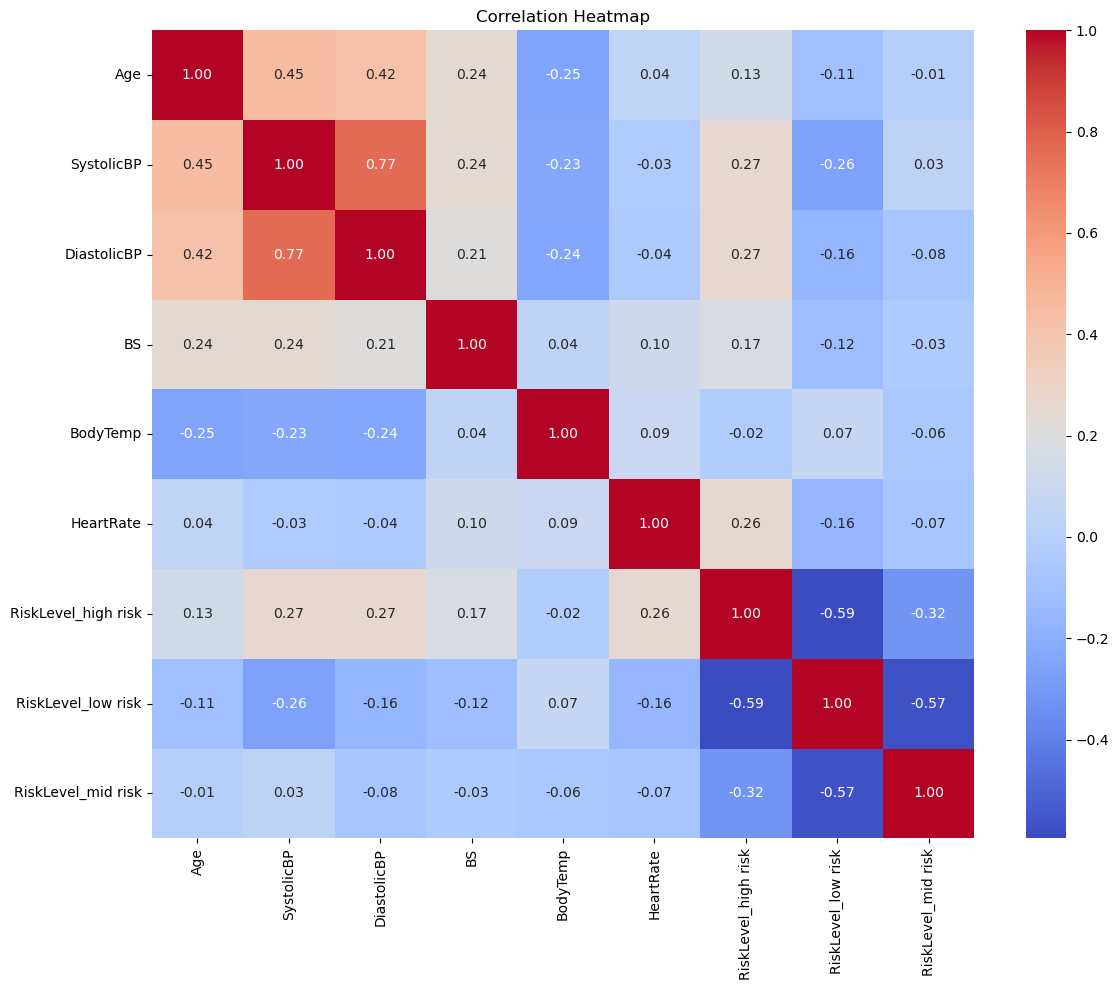

In [24]:
# Adjust the figure size as per your preference
plt.figure(figsize=(12, 10))  

# Compute the correlation matrix using the 'spearman' method
correlation_matrix = df_encoded.corr(method='spearman')


sns.heatmap (data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title and axis labels
plt.title('Correlation Heatmap')
plt.tight_layout()  # Improve the spacing between the heatmap and the axis labels

plt.show()

In [31]:
from sklearn.model_selection import train_test_split

# Features
X = df_encoded[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]

# One-hot encoded target columns
y = df_encoded[['RiskLevel_high risk', 'RiskLevel_low risk', 'RiskLevel_mid risk']]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (470, 6)
X_test shape: (118, 6)
y_train shape: (470, 3)
y_test shape: (118, 3)


In [33]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import warnings

In [50]:
from sklearn.impute import SimpleImputer

# Assuming X_train has NaN values
# Create an imputer with a strategy (mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform both the training and test data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now you can fit your model on the imputed data
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_imputed)


ValueError: Input y contains NaN.

In [37]:
X_train.isnull().sum()

Age            110
SystolicBP     110
DiastolicBP    110
BS             110
BodyTemp       110
HeartRate      110
dtype: int64

In [49]:
X_train.loc[X_train['HeartRate'] == 'null' ]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate


In [57]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15,98,86,high risk
1,35,140,90,13,98,70,high risk
2,29,90,70,8,100,80,high risk
3,30,140,85,7,98,70,high risk
4,35,120,60,6,98,76,low risk


In [58]:
df.RiskLevel.unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Assuming df is your DataFrame with features and target
# For example, let's assume you have columns 'Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel'


# Separate features and target
X = df.drop('RiskLevel', axis=1)  # Features
y = df['RiskLevel']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformers for numerical and categorical features
numerical_features = X.select_dtypes(include=['int', 'float']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', LabelEncoder())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('knn', KNeighborsRegressor())
]



# Iterate through the list of models
for model_name, model in models:
    # Create a pipeline for the current model
    current_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit the model
    current_model.fit(X_train, y_train)

    # Predictions on the test set
    predictions = current_model.predict(X_test)

    # Print results for the current model
    accuracy = accuracy_score(y_test, predictions)
    print(f"\n{model_name} Model:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, predictions))


Logistic Regression Model:
Accuracy: 0.6593406593406593
Classification Report:
               precision    recall  f1-score   support

   high risk       0.68      0.72      0.70        18
    low risk       0.64      0.96      0.77        47
    mid risk       1.00      0.08      0.14        26

    accuracy                           0.66        91
   macro avg       0.78      0.59      0.54        91
weighted avg       0.75      0.66      0.58        91


Random Forest Classifier Model:
Accuracy: 0.6263736263736264
Classification Report:
               precision    recall  f1-score   support

   high risk       0.75      0.67      0.71        18
    low risk       0.66      0.81      0.72        47
    mid risk       0.41      0.27      0.33        26

    accuracy                           0.63        91
   macro avg       0.61      0.58      0.59        91
weighted avg       0.60      0.63      0.61        91


Decision Tree Classifier Model:
Accuracy: 0.6483516483516484
Classific

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [76]:
y_pred

array(['high risk', 'low risk', 'mid risk', 'low risk', 'low risk',
       'low risk', 'high risk', 'low risk', 'low risk', 'low risk',
       'high risk', 'high risk', 'low risk', 'low risk', 'low risk',
       'low risk', 'low risk', 'low risk', 'low risk', 'low risk',
       'low risk', 'low risk', 'high risk', 'high risk', 'high risk',
       'low risk', 'low risk', 'low risk', 'high risk', 'low risk',
       'low risk', 'high risk', 'low risk', 'high risk', 'low risk',
       'low risk', 'low risk', 'low risk', 'high risk', 'low risk',
       'low risk', 'low risk', 'low risk', 'low risk', 'low risk',
       'high risk', 'mid risk', 'low risk', 'low risk', 'low risk',
       'low risk', 'low risk', 'low risk', 'low risk', 'low risk',
       'low risk', 'low risk', 'low risk', 'low risk', 'low risk',
       'low risk', 'high risk', 'low risk', 'high risk', 'low risk',
       'low risk', 'low risk', 'low risk', 'low risk', 'low risk',
       'high risk', 'low risk', 'low risk', 'hig

In [85]:
le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df.RiskLevel)

In [86]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15,98,86,0
1,35,140,90,13,98,70,0
2,29,90,70,8,100,80,0
3,30,140,85,7,98,70,0
4,35,120,60,6,98,76,1


In [99]:
# Separate features and target
X = df.drop('RiskLevel', axis=1)  # Features
y = df['RiskLevel']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
y_train.head()

24     1
17     0
66     2
427    1
522    2
Name: RiskLevel, dtype: int32

In [97]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [98]:
print(model.score(X_test, y_test))

0.6373626373626373


In [114]:
from sklearn.svm import SVC
# Create SVM classifier
svm_model = SVC(kernel="precomputed", random_state=42)

# Fit the model
svm_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

ValueError: Precomputed matrix must be a square matrix. Input is a 361x6 matrix.

In [115]:
from xgboost import XGBClassifier
# Create XGBoost classifier
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6483516483516484
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        18
           1       0.66      0.87      0.75        47
           2       0.50      0.23      0.32        26

    accuracy                           0.65        91
   macro avg       0.62      0.59      0.58        91
weighted avg       0.62      0.65      0.61        91

